### 1. Reading datasets

In [1]:

import os
import json
import pandas as pd
dataset = os.path.join('random_30000_hotel_reviews.JSON')
dat = pd.read_json(dataset, lines=True)
dat.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 1.0, 'cleanliness': 2.0, 'overall'...",“Horrible experience”,First of all we got there and they didn't have...,"{'username': 'Kh3RD', 'num_reviews': 1, 'id': ...",September 2012,80138,0,2012-09-19,140716137,False
1,"{'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...",“Stay Away”,Found Racist graffiti in the room. Request to ...,"{'username': 'TheUglyPhotographer', 'num_citie...",June 2011,240151,1,2011-06-27,114807323,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great location and service”,Close to Union Square - hotel is a bit of a ma...,"{'username': 'Moonstonemoclips', 'num_cities':...",October 2010,80793,0,2010-10-25,84805430,False
3,"{'service': 3.0, 'cleanliness': 2.0, 'overall'...",“I will never go back here again!”,I had a bad vibe about this place from the mom...,"{'username': 'JoanellenJ', 'num_cities': 10, '...",June 2012,111418,1,2012-06-28,132971117,False
4,{'overall': 1.0},“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...","{'username': 'Lynnworks', 'num_cities': 3, 'nu...",January 2012,671150,3,2012-02-04,124104157,False


In [2]:

dat['com']=dat['title']+" "+dat['text']
dat['com'].head()

0    “Horrible experience” First of all we got ther...
1    “Stay Away” Found Racist graffiti in the room....
2    “Great location and service” Close to Union Sq...
3    “I will never go back here again!” I had a bad...
4    “Ripped off our VISA card after departure” Aft...
Name: com, dtype: object

In [3]:

import re
dat['com'] = dat['com'].apply(lambda x: re.sub(r'\W+',' ', x))
dat['com'].head()

0     Horrible experience First of all we got there...
1     Stay Away Found Racist graffiti in the room R...
2     Great location and service Close to Union Squ...
3     I will never go back here again I had a bad v...
4     Ripped off our VISA card after departure Afte...
Name: com, dtype: object

In [4]:

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
dat['tokens'] = dat['com'].apply(lambda row: word_tokenize(row.lower()))
dat['tokens'].head()

[nltk_data] Downloading package punkt to /home/haru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [horrible, experience, first, of, all, we, got...
1    [stay, away, found, racist, graffiti, in, the,...
2    [great, location, and, service, close, to, uni...
3    [i, will, never, go, back, here, again, i, had...
4    [ripped, off, our, visa, card, after, departur...
Name: tokens, dtype: object

In [5]:


dat['overall_r']=dat['ratings'].apply(lambda row: row['overall'])
train_d = dat[:10000]
dev_d = dat[10000:20000]
test_d = dat[20000:]


train_d.shape, dev_d.shape, test_d.shape


((10000, 13), (10000, 13), (10000, 13))

In [6]:

dat[['title','text','id']].duplicated().sum()

0

### 2. Exploratory Data Analysis (EDA)

In [7]:
# Define a lambda function to count instances and extract unique words
unique_words = lambda text: len(set(text))
import numpy as np
dev_d['num_unique']=dev_d['tokens'].apply(lambda row: np.unique(row))
dev_d['num_unique']


/tmp/ipykernel_14272/228083500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_d['num_unique']=dev_d['tokens'].apply(lambda row: np.unique(row))


10000    [a, across, and, at, but, cabs, care, clarke, ...
10001    [2010, a, absolute, again, an, and, as, chaoti...
10002    [100, 16th, 2, 6, 8ft, a, after, all, also, an...
10003    [12th, 3, a, again, and, arrive, away, bathroo...
10004    [11, 15, 45, 8, a, again, all, allerton, also,...
                               ...                        
19995    [5, a, again, and, be, beautiful, best, but, c...
19996    [4th, and, breakfast, clean, convenient, downt...
19997    [85, a, admission, afternoon, also, amazing, a...
19998    [120, a, about, accommodation, again, aged, an...
19999    [2, a, across, allowed, and, basically, be, be...
Name: num_unique, Length: 10000, dtype: object

In [8]:

# Re-extract the 'overall' rating for the development set to ensure it exists
dev_d = dev_d.copy()  # This avoids SettingWithCopyWarning when we modify the DataFrame
dev_d['overall_r'] = dev_d['ratings'].apply(lambda x: x.get('overall', np.nan))

# Calculate the distribution of 'overall' ratings for the development set, again
dev_overall_r = dev_d['overall_r'].value_counts().sort_index()

# Recalculate the number of unique words in the review texts of the development set, avoiding warnings
dev_d['unique_word_c'] = dev_d['text'].apply(lambda x: len(set(x.split())))
total_unique_words_dev_corrected = dev_d['unique_word_c'].sum()

# Display the total number of unique words in the development set, corrected
dev_overall_r


overall_r
1.0     672
2.0     684
3.0    1353
4.0    3237
5.0    4054
Name: count, dtype: int64

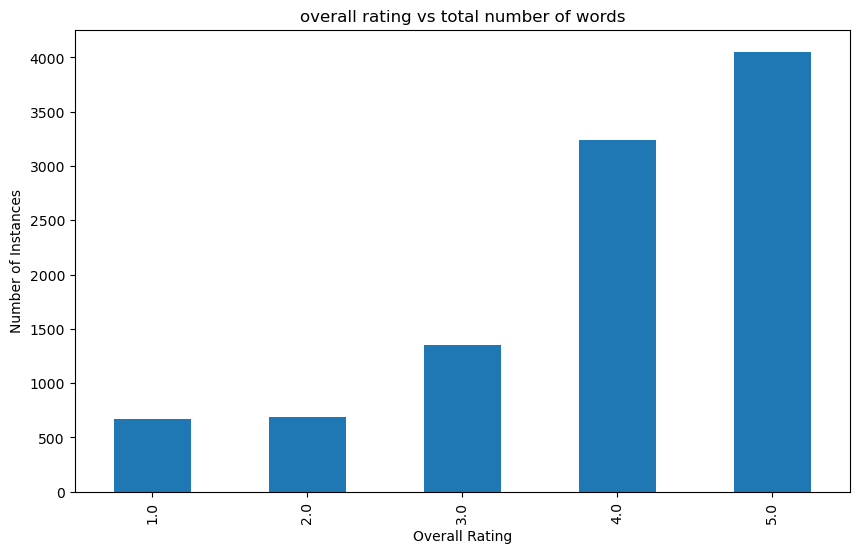

In [9]:
# this plot shows overall rating vs total number of words
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
dev_overall_r.plot(kind='bar')
plt.title('overall rating vs total number of words')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Instances')
plt.show()


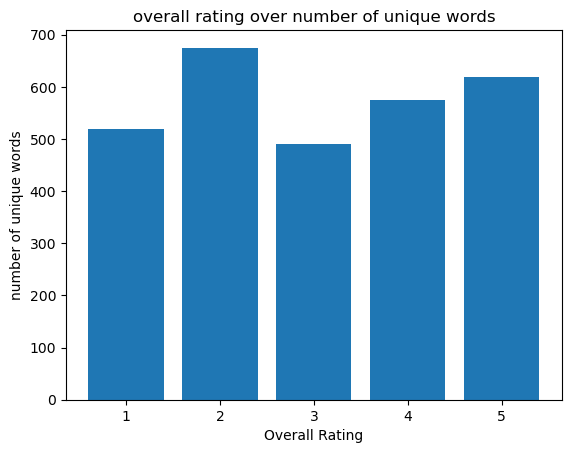

In [10]:
# this plot shows overall rating over number of unique words
plt.bar(x=dev_d['overall_r'],height=[len(a) for a in dev_d['num_unique']])
plt.title('overall rating over number of unique words')
plt.xlabel('Overall Rating')
plt.ylabel('number of unique words')
plt.show()

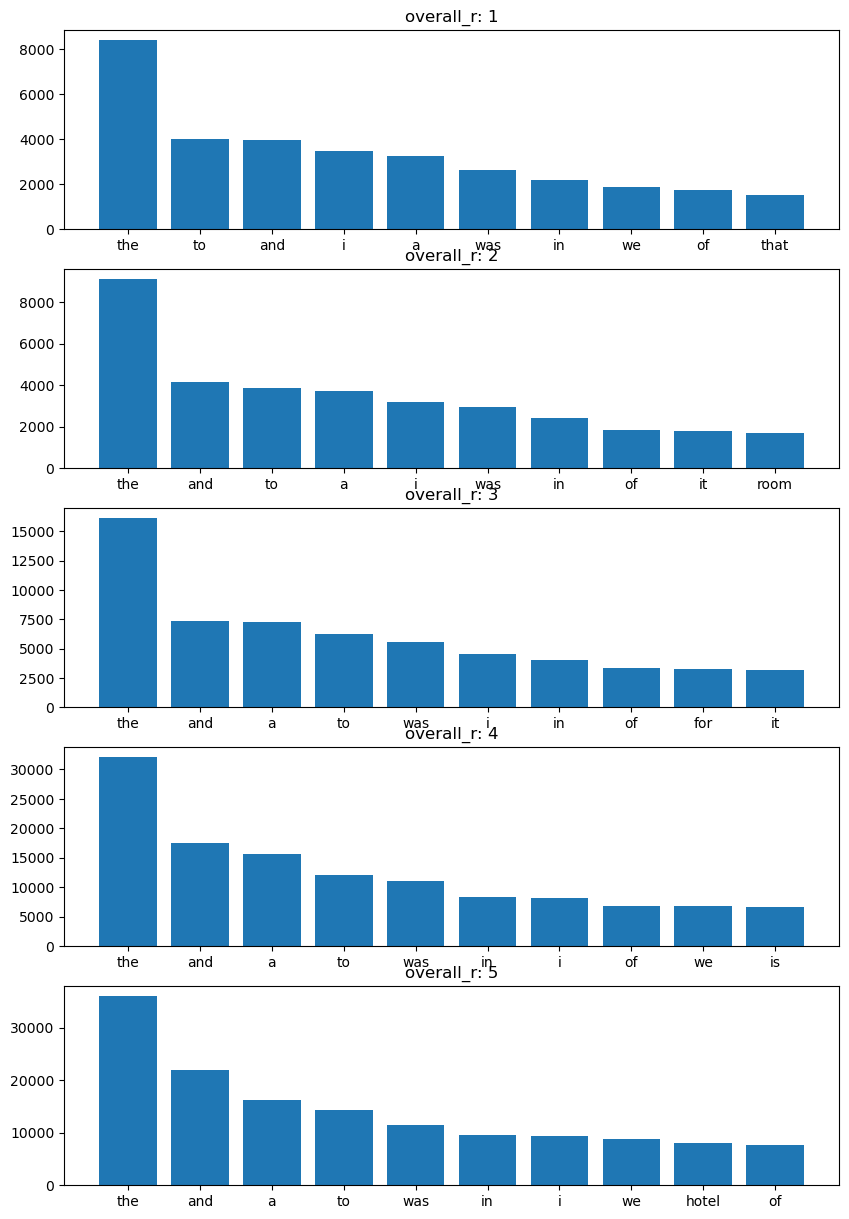

In [11]:
# this plot shows overall rating over number of instances of unique words
import matplotlib.pyplot as plt
import collections
fig,ax=plt.subplots(nrows=5,figsize=(10,15))
no_of_instances=pd.DataFrame({'overall_r':[a for a in range(1,6)]})
no_of_instances['comment_combined']=""
for i,rating in enumerate(no_of_instances['overall_r']):
    no_of_instances.loc[i,'comment_combined']=("".join(dev_d['com'][dev_d['overall_r']==rating])).lower()
no_of_instances['unique_words']=no_of_instances['comment_combined'].apply(lambda row: (word_tokenize(row)))

for i in range(5):
    counter=collections.Counter(no_of_instances['unique_words'][i])
    ax[i].bar(x=list(dict(sorted(dict(counter).items(),key=lambda x: x[1],reverse=True)[:10]).keys()),height=dict(sorted(dict(counter).items(),key=lambda x: x[1],reverse=True)[:10]).values())
    ax[i].title.set_text("overall_r: "+str(no_of_instances['overall_r'][i]))

### 3. Preprocessing

In [12]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [13]:
# lemmatization,removing stop words and vectorization and tf-idf

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from string import punctuation

import spacy
nlp=spacy.load('en_core_web_sm')
# defining a clear function
def clearer(com):
    # making the text lowercase 
    com=com.lower()
    # removing new lines
    com=com.replace("\t","")
    # removing punctuations
    com="".join([character for character in com if character not in punctuation])
    # tokenization
    com=word_tokenize(com)
    #removing stop words
    com=[word for word in com if word not in stop_words]
    # removing any extra spces might be useful
    doc=nlp(" ".join(com))
    com=[word.lemma_ for word in doc]
    return " ".join(com) 
train_d['cleaned comment']=train_d['com'].apply(lambda row: clearer(row))
dev_d['cleaned comment']=dev_d['com'].apply(lambda row: clearer(row))
#data['review']=data['review'].apply(lambda row: clear(row))
train_d.head()

/tmp/ipykernel_14272/2839882758.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_d['cleaned comment']=train_d['com'].apply(lambda row: clearer(row))


,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,com,tokens,overall_r,cleaned comment
0,"{'service': 1.0, 'cleanliness': 2.0, 'overall'...",“Horrible experience”,First of all we got there and they didn't have...,"{'username': 'Kh3RD', 'num_reviews': 1, 'id': ...",September 2012,80138,0,2012-09-19,140716137,False,Horrible experience First of all we got there...,"[horrible, experience, first, of, all, we, got...",1.0,horrible experience first get room book pay we...
1,"{'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...",“Stay Away”,Found Racist graffiti in the room. Request to ...,"{'username': 'TheUglyPhotographer', 'num_citie...",June 2011,240151,1,2011-06-27,114807323,False,Stay Away Found Racist graffiti in the room R...,"[stay, away, found, racist, graffiti, in, the,...",1.0,stay away find racist graffiti room request ch...
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great location and service”,Close to Union Square - hotel is a bit of a ma...,"{'username': 'Moonstonemoclips', 'num_cities':...",October 2010,80793,0,2010-10-25,84805430,False,Great location and service Close to Union Squ...,"[great, location, and, service, close, to, uni...",4.0,great location service close union square hote...
3,"{'service': 3.0, 'cleanliness': 2.0, 'overall'...",“I will never go back here again!”,I had a bad vibe about this place from the mom...,"{'username': 'JoanellenJ', 'num_cities': 10, '...",June 2012,111418,1,2012-06-28,132971117,False,I will never go back here again I had a bad v...,"[i, will, never, go, back, here, again, i, had...",2.0,never go back bad vibe place moment walk main ...
4,{'overall': 1.0},“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...","{'username': 'Lynnworks', 'num_cities': 3, 'nu...",January 2012,671150,3,2012-02-04,124104157,False,Ripped off our VISA card after departure Afte...,"[ripped, off, our, visa, card, after, departur...",1.0,rip visa card departure receive final bill lea...


In [14]:
print(train_d.columns)

Index(['ratings', 'title', 'text', 'author', 'date_stayed', 'offering_id',
       'num_helpful_votes', 'date', 'id', 'via_mobile', 'com', 'tokens',
       'overall_r', 'cleaned comment'],
      dtype='object')


In [15]:
# Upscaling the training dataset
import pandas as pd
import numpy as np

# Assuming 'train' DataFrame with 'overall_rating' as the target
X_train = train_d.drop('overall_r', axis=1)  
y_train = train_d['overall_r']

# Combine X_train and y_train to simplify resampling
train_combined = pd.concat([X_train, y_train], axis=1)

# Determine the number of instances in the largest class
max_size = train_combined['overall_r'].value_counts().max()

# Upsample each class to match the max size
resampled = [train_combined[train_combined['overall_r'] == class_].sample(n=max_size, replace=True, random_state=42) for class_ in train_combined['overall_r'].unique()]

# Combine the resampled classes back into one DataFrame
train_resampled = pd.concat(resampled)

# Separate the features and the target variable after resampling
X_train_b = train_resampled.drop('overall_r', axis=1)
y_train_b = train_resampled['overall_r']


Original Dataset Distribution:
overall_r
5.0    4136
4.0    3195
3.0    1377
2.0     664
1.0     628
Name: count, dtype: int64

Balanced Dataset Distribution:
overall_r
1.0    4136
4.0    4136
2.0    4136
3.0    4136
5.0    4136
Name: count, dtype: int64


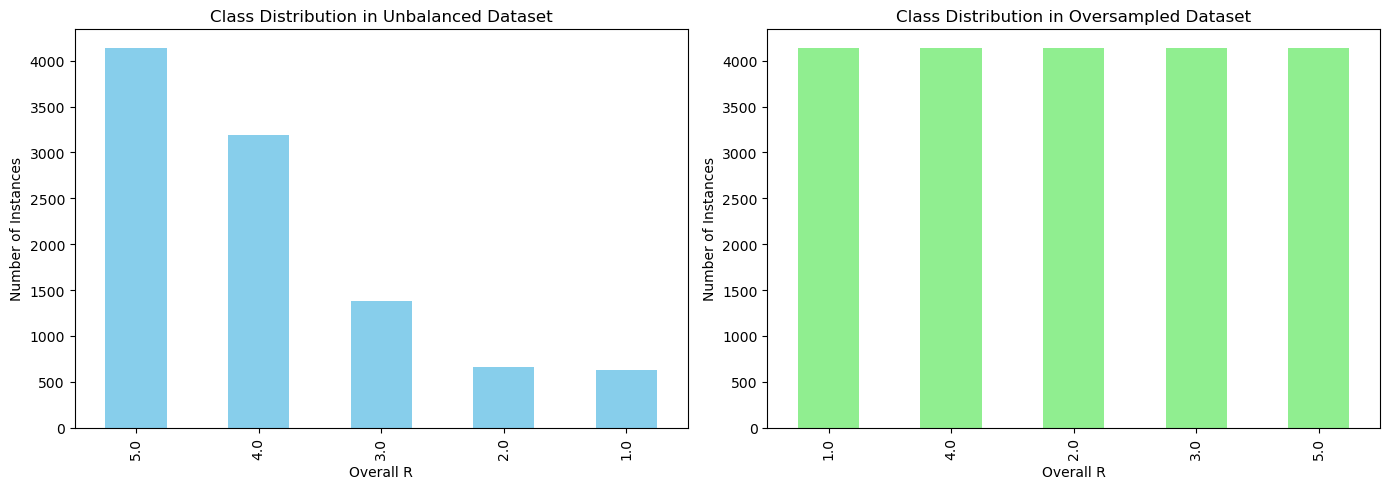

In [16]:
import matplotlib.pyplot as plt

# Display the value counts for the original and balanced datasets
print("Original Dataset Distribution:")
print(y_train.value_counts())

print("\nBalanced Dataset Distribution:")
print(y_train_b.value_counts())

# Plotting the distributions
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))

# Bar graph for the original dataset
y_train.value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Class Distribution in Unbalanced Dataset')
ax[0].set_xlabel('Overall R')
ax[0].set_ylabel('Number of Instances')

# Bar graph for the balanced dataset
y_train_b.value_counts().plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Class Distribution in Oversampled Dataset')
ax[1].set_xlabel('Overall R')
ax[1].set_ylabel('Number of Instances')

plt.tight_layout()
plt.show()

In [17]:
## Vectorization using tf-idf (chosen tf-idf since it takes into account the importance of a word using the frequencies)
## vectorizing by taking the corpus only from train dataset
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
train_cor=[row for row in X_train_b['cleaned comment']]
train_tfidf=vectorizer.fit_transform(train_cor)
print(train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 4. Selecting supervised method for sentiment classification

SVM is a powerful and reliable technique for sentiment analysis, thanks to its capacity to handle complex and high-dimensional spaces, making it well-suited for text classification tasks, especially in scenarios with sparse and extensive feature spaces.

In [18]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Preparing the development set
X_dev=dev_d.drop('overall_r',axis=1)
y_dev=dev_d['overall_r']

# vectorizing the development dataset
dev_cor=[row for row in X_dev['cleaned comment']]
dev_tfidf=vectorizer.transform(dev_cor)

clf=SVC()
clf.fit(train_tfidf,y_train_b)
y_dev_pred=clf.predict(dev_tfidf)

print(y_dev_pred)
print("Accuracy: ", accuracy_score(y_dev, y_dev_pred))
print('Report:\n',classification_report(y_dev,y_dev_pred))

[4. 5. 1. ... 4. 4. 4.]
Accuracy:  0.6084
Report:
               precision    recall  f1-score   support

         1.0       0.65      0.64      0.65       672
         2.0       0.37      0.23      0.29       684
         3.0       0.43      0.46      0.45      1353
         4.0       0.55      0.60      0.57      3237
         5.0       0.74      0.72      0.73      4054

    accuracy                           0.61     10000
   macro avg       0.55      0.53      0.54     10000
weighted avg       0.61      0.61      0.61     10000



In [19]:
## Stratified 10 fold cross validation 
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score

def clearer(com):
    # removing new lines
    com=com.replace("\t","")
    # removing punctuations
    com="".join([character for character in com if character not in punctuation])
    # tokenization
    com=word_tokenize(com)
    # removing stop words
    com=[word for word in com if word not in stop_words]
    return " ".join(com)

# clean function
dev_d['cleaned comment']=dev_d['com'].apply(lambda row: clearer(row))
X_dev=dev_d['cleaned comment'].reset_index(drop=True)
y_dev=dev_d['overall_r'].reset_index(drop=True)

# 10 fold - svc

clf=SVC()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy=[]
f1_scores=[]

for train_index, test_index in skf.split(X_dev,y_dev):
    X_train_fold, X_test_fold = X_dev[train_index], X_dev[test_index]
    y_train_fold, y_test_fold = y_dev[train_index], y_dev[test_index]

#Vectorizing
    vectorizer=TfidfVectorizer()
    
    train_cor=[row for row in X_train_fold]
    test_cor=[row for row in X_test_fold]
    train_tfidf=vectorizer.fit_transform(train_cor)
    test_tfidf=vectorizer.transform(test_cor)
    
    clf.fit(train_tfidf, y_train_fold)
    pred=clf.predict(test_tfidf)
    accuracy.append(accuracy_score(y_test_fold,pred))
    f1_scores.append(f1_score(y_test_fold,pred,average='weighted'))
                    
print("Stop Word Removal")
print("Accuracy: ", accuracy)
print('Mean accuracy',np.mean(accuracy))
print('F1 scores',f1_scores)
print('mean f1 score',np.mean(f1_scores))

Stop Word Removal
Accuracy:  [0.596, 0.626, 0.623, 0.606, 0.607, 0.615, 0.646, 0.615, 0.609, 0.616]
Mean accuracy 0.6159
F1 scores [0.5814833518402918, 0.6088595281124717, 0.6055972393026368, 0.5852381541475697, 0.5889591831478744, 0.5989104264977438, 0.6286672772581599, 0.5966535565203555, 0.5941565277349306, 0.6007634218997113]
mean f1 score 0.5989288666461745


In [20]:
# Stratified 10 fold cross validation 
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score

def clearer(com):
    ## removing new lines
    com=com.replace("\t","")
    ## removing punctuations
    com="".join([character for character in com if character not in punctuation])
    # tokenization
    com=word_tokenize(com)
    #lemmatizing
    doc=nlp(" ".join(com))
    com=[word.lemma_ for word in doc]
    return " ".join(com)

#clean function
dev_d['cleaned comment']=dev_d['com'].apply(lambda row: clearer(row))
X_dev=dev_d['cleaned comment'].reset_index(drop=True)
y_dev=dev_d['overall_r'].reset_index(drop=True)

# 10 fold - svc
clf=SVC()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

accuracy=[]
f1_scores=[]

for train_index, test_index in skf.split(X_dev,y_dev):
    
    X_train_fold, X_test_fold = X_dev[train_index], X_dev[test_index]
    y_train_fold, y_test_fold = y_dev[train_index], y_dev[test_index]

# Vectorizing
    vectorizer=TfidfVectorizer()
    
    train_cor=[row for row in X_train_fold]
    test_cor=[row for row in X_test_fold]
    train_tfidf=vectorizer.fit_transform(train_cor)
    test_tfidf=vectorizer.transform(test_cor)
    
    clf.fit(train_tfidf, y_train_fold)
    pred=clf.predict(test_tfidf)
    accuracy.append(accuracy_score(y_test_fold,pred))
    f1_scores.append(f1_score(y_test_fold,pred,average='weighted'))

print("Lemmatization")
print("Accuracy: ", accuracy)
print("mean accuracy", np.mean(accuracy))
print('F1 scores',f1_scores)
print('avg f1 score',np.mean(f1_scores))

Lemmatization
Accuracy:  [0.595, 0.623, 0.602, 0.608, 0.613, 0.613, 0.64, 0.616, 0.61, 0.627]
mean accuracy 0.6147
F1 scores [0.5844816931413825, 0.6100461658331758, 0.5876071787271058, 0.5883109376469366, 0.600786416783757, 0.5995686903735468, 0.629518047677978, 0.6018011507268543, 0.5981194651123081, 0.6142926569236277]
avg f1 score 0.6014532402946673


In [21]:
## Stratified 10 fold cross validation 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import StratifiedKFold

def clearer(com):
    ## making the text lowercase -- we already did this above as well
    com=com.lower()
    ## removing new lines
    com=com.replace("\t","")
    ## removing punctuations
    com="".join([character for character in com if character not in punctuation])
    ## tokenization
    com=word_tokenize(com)
    return " ".join(com)

## clean function
dev_d['cleaned comment']=dev_d['com'].apply(lambda row: clearer(row))
X_dev=dev_d['cleaned comment'].reset_index(drop=True)
y_dev=dev_d['overall_r'].reset_index(drop=True)

# 10 fold - svc

clf=SVC()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy=[]
f1_scores=[]

for train_index, test_index in skf.split(X_dev,y_dev):
    
    X_train_fold, X_test_fold = X_dev[train_index], X_dev[test_index]
    y_train_fold, y_test_fold = y_dev[train_index], y_dev[test_index]

    ##Vectorizing
    vectorizer=TfidfVectorizer()
    
    train_cor=[row for row in X_train_fold]
    test_cor=[row for row in X_test_fold]
    train_tfidf=vectorizer.fit_transform(train_cor)
    test_tfidf=vectorizer.transform(test_cor)
    
    clf.fit(train_tfidf, y_train_fold)
    pred=clf.predict(test_tfidf)
    accuracy.append(accuracy_score(y_test_fold,pred))
    f1_scores.append(f1_score(y_test_fold,pred,average='weighted'))

print("\nCleaning: Lowercasing")
print("Accuracy: ", accuracy)
print('F1 scores',f1_scores)
print('avg f1 score',np.mean(f1_scores))


Cleaning: Lowercasing
Accuracy:  [0.617, 0.632, 0.618, 0.617, 0.605, 0.621, 0.635, 0.62, 0.598, 0.639]
F1 scores [0.6050471761125669, 0.6176230885315658, 0.6034916860543296, 0.5991149175527698, 0.5885491737381909, 0.6044533442660097, 0.6207138857899195, 0.6019546820945, 0.5845869211342307, 0.6241458303530334]
avg f1 score 0.6049680705627116


### 5. Sentiment classification using VADER lexicon and method

In [22]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,f1_score

sid = SentimentIntensityAnalyzer()
dev_d['vader score']=dev_d['com'].apply(lambda row: sid.polarity_scores(row)['compound'])

## defining the ranges

## vader score below -0.5 is 1 in review
## vader score between -0.5 and -0.1666 is 2 in review
## vader score between -0.1666 to 0.1666 is 3 in review
## vader score between 0.1666 to 0.5 is 4 in review
## vader score above 0.5 is 5 in review

def vader_to_review(vader_score):
    if(vader_score<=-0.6):
        return 1
    elif(vader_score>-0.6 and vader_score<-0.17):
        return 2
    elif(vader_score>=-0.17 and vader_score<0.17):
        return 3
    elif(vader_score>=0.17 and vader_score<0.6):
        return 4
    elif(vader_score>=0.6):
        return 5

y_dev_pred=dev_d['vader score'].reset_index(drop=True)
y_dev_true=dev_d['overall_r'].reset_index(drop=True)

y_dev_pred=y_dev_pred.apply(lambda row: vader_to_review(row))
#print(y_dev_pred)
## 10 fold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy=[]
f1_scores=[]

for train_index, test_index in skf.split(y_dev_true,y_dev_pred):
    X_train_fold, y_dev_true_fold = y_dev_true[train_index], y_dev_true[test_index]
    y_train_fold, y_dev_pred_fold = y_dev_pred[train_index], y_dev_pred[test_index]

    #print(y_dev_true_fold,y_dev_pred_fold)
    accuracy.append(accuracy_score(y_dev_true_fold,y_dev_pred_fold))
    f1_scores.append(f1_score(y_dev_true_fold,y_dev_pred_fold,average='weighted'))
    #print(classification_report(y_dev_true_fold,y_dev_pred_fold))

print("\nVader Predictions:")
#print("Accuracy: ", accuracy)
#print('F1 scores',f1_scores)
print('avg f1 score',np.mean(f1_scores))


Vader Predictions:
avg f1 score 0.32989453797586393


In [23]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
dev_d['vader score']=dev_d['com'].apply(lambda row: sid.polarity_scores(row)['compound'])

## defining the ranges

## vader score below -0.5 is 1 in review
## vader score between -0.5 and -0.1666 is 2 in review
## vader score between -0.1666 to 0.1666 is 3 in review
## vader score between 0.1666 to 0.5 is 4 in review
## vader score above 0.5 is 5 in review

def vader_to_score(vader):
    if vader>=0.5:
        return 1
    elif vader<=-0.5:
        return -1
    elif vader>-0.5 and vader<0.5:
        return 0

def rating_to_score(rating):
    if rating==4 or rating==5:
        return 1
    elif rating==3:
        return 0
    elif rating ==1 or rating ==2:
        return -1

y_dev_pred=dev_d['vader score'].reset_index(drop=True)
y_dev_true=dev_d['overall_r'].reset_index(drop=True)

y_dev_pred=y_dev_pred.apply(lambda row: vader_to_score(row))
y_dev_true=y_dev_true.apply(lambda row: rating_to_score(row))
#print(y_dev_pred,y_dev_true)
## 10 fold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy=[]
f1_scores=[]

for train_index, test_index in skf.split(y_dev_true,y_dev_pred):
    X_train_fold, y_dev_true_fold = y_dev_true[train_index], y_dev_true[test_index]
    y_train_fold, y_dev_pred_fold = y_dev_pred[train_index], y_dev_pred[test_index]

    #print(y_dev_true_fold,y_dev_pred_fold)
    accuracy.append(accuracy_score(y_dev_true_fold,y_dev_pred_fold))
    f1_scores.append(f1_score(y_dev_true_fold,y_dev_pred_fold,average='weighted'))

print("\nVader Predictions:")
print("Accuracy: ", accuracy)
print('F1 scores',f1_scores)
print('avg f1 score',np.mean(f1_scores))


Vader Predictions:
Accuracy:  [0.796, 0.783, 0.79, 0.784, 0.759, 0.777, 0.789, 0.77, 0.769, 0.782]
F1 scores [0.7580129740785203, 0.7436839474324853, 0.7543490683229813, 0.7449561811262136, 0.7115364192382541, 0.7378640399752301, 0.7539611764112053, 0.728073144257703, 0.7252458549863479, 0.7425328015365957]
avg f1 score 0.7400215607365537


### 6. Combining VADER with the best classifier

In [24]:
## created a new dataframe with vectors and compound score
train_d['cleaned comment']=train_d['com'].apply(lambda row: clearer(row))
dev_d=dev_d.reset_index(drop=True)
dev_d['cleaned comment']=dev_d['com'].apply(lambda row: clearer(row))
y_train=train_d['overall_r']
y_dev=dev_d['overall_r']

vectorizer=TfidfVectorizer()
train_cor=[row for row in train_d['cleaned comment']]
train_tfidf=vectorizer.fit_transform(train_cor).toarray()
train_d['vader score']=train_d['com'].apply(lambda row: sid.polarity_scores(row)['compound'])

dev_cor=[row for row in dev_d['cleaned comment']]
dev_tfidf=pd.DataFrame(vectorizer.transform(dev_cor).toarray())
dev_d['vader score']=dev_d['com'].apply(lambda row: sid.polarity_scores(row)['compound'])

train_vader=np.column_stack([train_tfidf,np.array(train_d['vader score'])])
dev_vader=np.column_stack([dev_tfidf,np.array(dev_d['vader score'])])

# svm with rbf kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

clf=SVC()
clf.fit(train_vader,y_train)

y_dev_pred=clf.predict(dev_vader)

print(y_dev_pred)
print("Accuracy: ", accuracy_score(y_dev, y_dev_pred))
print('Classification Report:\n',classification_report(y_dev,y_dev_pred))

/tmp/ipykernel_14272/1209241049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_d['cleaned comment']=train_d['com'].apply(lambda row: clearer(row))
/tmp/ipykernel_14272/1209241049.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_d['vader score']=train_d['com'].apply(lambda row: sid.polarity_scores(row)['compound'])


[4. 4. 4. ... 5. 4. 4.]
Accuracy:  0.6072
Classification Report:
               precision    recall  f1-score   support

         1.0       0.56      0.68      0.61       672
         2.0       0.28      0.06      0.10       684
         3.0       0.42      0.32      0.36      1353
         4.0       0.54      0.60      0.57      3237
         5.0       0.73      0.79      0.76      4054

    accuracy                           0.61     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.58      0.61      0.59     10000



### 7. Trainig and testing the final method

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score


def clearer(comm):
    ## making the text lowercase -- we already did this above as well
    comm=comm.lower()
    ## removing new lines
    comm=comm.replace("\t","")
    ## removing punctuations
    comm="".join([character for character in comm if character not in punctuation])
    ## tokenization
    comm=word_tokenize(comm)
    return " ".join(comm)

## applying the clean function
train_d['cleaned comment']=train_d['com'].apply(lambda row: clearer(row))
test_d['cleaned comment']=test_d['com'].apply(lambda row: clearer(row))

X_train=train_d['cleaned comment'].reset_index(drop=True)
y_train=train_d['overall_r'].reset_index(drop=True)

X_test=test_d['cleaned comment'].reset_index(drop=True)
y_test=test_d['overall_r'].reset_index(drop=True)

clf=SVC()

train_cor=[row for row in X_train]
test_cor=[row for row in X_test]
train_tfidf=vectorizer.fit_transform(train_cor)
test_tfidf=vectorizer.transform(test_cor)
    
clf.fit(train_tfidf, y_train)
pred=clf.predict(test_tfidf)
accuracy=[]
f1_scores=[]
accuracy.append(accuracy_score(y_test,pred))
f1_scores.append(f1_score(y_test,pred,average='weighted'))

print("testing the final method")
print("Accuracy: ", accuracy)
print('avg accuracy',np.mean(accuracy))
print('F1 scores',f1_scores)
print('avg f1 score',np.mean(f1_scores))

/tmp/ipykernel_14272/419208419.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_d['cleaned comment']=train_d['com'].apply(lambda row: clearer(row))
/tmp/ipykernel_14272/419208419.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_d['cleaned comment']=test_d['com'].apply(lambda row: clearer(row))


testing the final method
Accuracy:  [0.6187]
avg accuracy 0.6187
F1 scores [0.605352622514554]
avg f1 score 0.605352622514554
